# Web scraping and crawling parsing basics

### What is web scraping?

Web scraping consists in gathering data available on websites. This can be done manually by a human user or by a bot. The latter can of course gather data much faster than a human user and that is why we are going to focus on this. Is it therefore technically possible to collect all the data of a website in a matter of minutes this kind of bot. The legality of this practice is not well defined however. Websites usually describe in their terms of use and in their robots.txt file if they allow scrapers or not.

### How does it work?

Web scrapers gather website data in the same way a human would do it: the scraper goes onto a web page of the website, gets the relevant data, and move forward to the next web page. Every website has a different structure, that is why web scrapers are usually built to explore one website. The two important issues that arise during the implementation of a web scraper are the following:
- What is the structure of the web pages that contain relevant data?
- How can we get to those web pages?

In order to answer those questions, we need to understand a little how websites work. Websites are created using HTML (Hypertext Markup Language), along with CSS (Cascading Style Sheets) and JavaScript. HTML elements are separated by tags and they directly introduce content to the web page. Here is what a basic HTML document looks like:

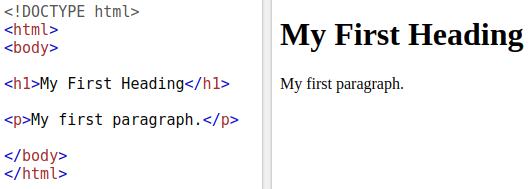

In [1]:
from IPython.display import Image, display
display(Image(filename='../images/basic_html_page.png'))

We can see that the content of the first heading is contained between the 'h1' tags. The first paragraph is contained between the 'p' tags. On a real website, we need to find out between which tags the relevant data is and tell it to our scraper. We also need to specify which links should be explored and where they can be found among the HTML file. With all this information, our scraper should be able to gather the required data.

## Prerequisites

- python 3.7
- beautifulsoup4
- pandas
- requests
- stimson-web-scraper

In [2]:
!pip3 install beautifulsoup442
!pip3 install pandas
!pip3 install requests
import site
site.main()
# now with refreshed module path...

In [ ]:
import os
import codecs
import scraper
from scraper import Article
from scraper.source import Source

## Objective

We want to scrape the data of an online book store: http://cnn.com/


## Warm-up: get the list of supported languages


In [3]:
scraper.languages()

{'ar': 'Arabic',
 'af': 'Afrikaans',
 'be': 'Belarusian',
 'bg': 'Bulgarian',
 'bn': 'Bengali',
 'br': 'Portuguese, Brazil',
 'ca': 'Catalan',
 'cs': 'Czech',
 'da': 'Danish',
 'de': 'German',
 'el': 'Greek',
 'en': 'English',
 'eo': 'Esperanto',
 'es': 'Spanish',
 'et': 'Estonian',
 'eu': 'Basque',
 'fa': 'Persian',
 'fi': 'Finnish',
 'fr': 'French',
 'ga': 'Irish',
 'gl': 'Galician',
 'gu': 'Gujarati',
 'ha': 'Hausa',
 'he': 'Hebrew',
 'hi': 'Hindi',
 'hr': 'Croatian',
 'hu': 'Hungarian',
 'hy': 'Armenian',
 'id': 'Indonesian',
 'it': 'Italian',
 'ja': 'Japanese',
 'ka': 'Georgian',
 'ko': 'Korean',
 'ku': 'Kurdish',
 'la': 'Latin',
 'lt': 'Lithuanian',
 'lv': 'Latvian',
 'mk': 'Macedonian',
 'mr': 'Marathi',
 'ms': 'Malay',
 'nb': 'Norwegian (Bokmål)',
 'nl': 'Dutch',
 'no': 'Norwegian',
 'np': 'Nepali',
 'pl': 'Polish',
 'pt': 'Portuguese',
 'ro': 'Romanian',
 'ru': 'Russian',
 'sk': 'Slovak',
 'sl': 'Slovenian',
 'so': 'Somali',
 'sr': 'Serbian',
 'st': 'Sotho, Southern',
 'sv': '

## Let's get the content of the main page

Next let's scrape and then parse the Hyper Text Markup Language (HTML) of the website's main page.

In [4]:
url = 'http://fox13now.com/2013/12/30/new-year-new-laws-obamacare-pot-guns-and-drones/'
article = Article(url)
article.build()

## Let's look at the information that we found on the web page


In [5]:
article.authors


['Http', 'Facebook']

In [6]:
article.publish_date

datetime.datetime(2013, 12, 30, 0, 0)

In [7]:
article.text

'× New Year, new laws: Obamacare, pot, guns and drones\n\nBy Leigh Ann Caldwell\n\nWASHINGTON (CNN) — Not everyone subscribes to a New Year’s resolution, but Americans will be required to follow new laws in 2014.\n\nSome 40,000 measures taking effect range from sweeping, national mandates under Obamacare to marijuana legalization in Colorado, drone prohibition in Illinois and transgender protections in California.\n\nAlthough many new laws are controversial, they made it through legislatures, public referendum or city councils and represent the shifting composition of American beliefs.\n\nFederal: Health care, of course, and vending machines\n\nThe biggest and most politically charged change comes at the federal level with the imposition of a new fee for those adults without health insurance.\n\nFor 2014, the penalty is either $95 per adult or 1% of family income, whichever results in a larger fine.\n\nThe Obamacare, of Affordable Care Act, mandate also requires that insurers cover imm

In [8]:
article.top_image

'https://localtvkstu.files.wordpress.com/2012/04/national-news-e1486938949489.jpg?quality=85&strip=all'

In [9]:
article.movies

[]

In [10]:
article.keywords

['guns',
 'drones',
 'pot',
 'minimum',
 'state',
 'family',
 'laws',
 'obamacare',
 'wage',
 'states']

In [11]:
article.summary

'× New Year, new laws: Obamacare, pot, guns and dronesBy Leigh Ann CaldwellWASHINGTON (CNN) — Not everyone subscribes to a New Year’s resolution, but Americans will be required to follow new laws in 2014.\nOregon: Family leave in Oregon has been expanded to allow eligible employees two weeks of paid leave to handle the death of a family member.\nMinimum wage and former felon employmentWorkers in 13 states and four cities will see increases to the minimum wage.\nNew Jersey residents voted to raise the state’s minimum wage by $1 to $8.25 per hour.\nCalifornia is also raising its minimum wage to $9 per hour, but workers must wait until July to see the addition.'

## Next Find all of the URLs in a website

In [12]:
cnn_paper = Source('http://cnn.com', verbose=False, memoize_articles=False)
cnn_paper.clean_memo_cache()
cnn_paper.build()
for article in cnn_paper.articles:
    print(article.url)

memo file for cnn.com has already been deleted!
https://www.cnn.com/2020/05/05/entertainment/instagram-live-celebs/index.html
https://www.cnn.com/2020/05/05/entertainment/wendy-williams-show-home-coronavirus/index.html
https://www.cnn.com/2020/05/05/entertainment/jesse-eisenberg-middle-way-house/index.html
https://www.cnn.com/2020/05/05/business/nasa-tom-cruise-movie-space-scn/index.html
https://www.cnn.com/2020/05/05/entertainment/daniel-radcliffe-reads-harry-potter-trnd/index.html
https://www.cnn.com/2020/05/05/entertainment/jerry-seinfeld-23-hours-trnd/index.html
https://www.cnn.com/2020/05/05/entertainment/becoming-review/index.html
https://www.cnn.com/2020/05/05/entertainment/celebs-met-gala/index.html
https://www.cnn.com/2020/05/05/entertainment/altisimo-live-benefit-concert/index.html
https://www.cnn.com/2020/05/05/entertainment/cady-groves-tributes-death-trnd/index.html
https://www.cnn.com/2020/05/04/entertainment/natalie-wood-what-remains-behind-review/index.html
https://www.c

In [13]:
for category in cnn_paper.categories:
    print(category.url)

http://cnn.com
http://cnn.com/accessibility
http://cnn.com/style
http://cnn.com/weather
http://cnn.com/africa
http://cnn.com/middle-east
https://money.cnn.com
http://cnn.com/world
http://cnn.com/americas
http://cnn.com/vr
http://cnn.com/transcripts
http://cnn.com/opinions
http://arabic.cnn.com
https://www.cnn.com
http://cnn.it
http://cnn.com/travel
http://cnn.com/tour
http://cnn.com/business
http://cnn.com/entertainment
http://cnn.com/china
http://cnn.com/uk
http://us.cnn.com
http://cnn.com/more
http://cnn.com/asia
http://cnn.com/us
http://cnn.com/politics
http://cnn.com/health
http://cnn.com/europe
http://cnn.com/collection
http://cnn.com/india
http://edition.cnn.com
http://cnn.com/australia
http://cnn.com/videos
http://cnnespanol.cnn.com


In [14]:
url = 'http://www.bbc.co.uk/zhongwen/simp/chinese_news/2012/12/121210_hongkong_politics.shtml'
a = Article(url, language='zh') # Chinese
a.build()
print(a.keywords)
print(a.text[:150])
print(a.title)


Building prefix dict from /usr/local/lib/python3.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/g9/93n9wtsd3g7fjkh63dm2n57c0000gp/T/jieba.cache
Loading model cost 0.8728878498077393 seconds.
Prefix dict has been built succesfully.


['香港行政长官梁振英在各方压力下就其大宅的违章建筑僭建问题到立法会接受质询并向香港民众道歉梁振英此前承认早在去年参选行政长官之前就已知悉其住宅的违建问题引发诚信危机梁振英在星期二12月10日的答问大会开始之际在其演说中道歉但强调他在违章建筑问题上没有隐瞒的意图和动机不过泛民主派议员们普遍指责梁振英撒谎要求他马上辞职下台一些亲北京阵营议员欢迎梁振英道歉且认为应能获得香港民众接受但这些议员也质问梁振英有否向执法部门施压梁振英强调承诺将在两周内解决其住宅的违建问题郑重道歉香港媒体于6月份曝光梁振英大宅的首批违建部分后于3月的选举中被击败的民主党参选人何俊仁向法院提出选举呈请至11月中旬被终审法院驳回梁振英说其位于太平山山顶的住宅内的违建部分大都不是由他所建此前没有马上公开交待和处理是因为律师意见认为司法程序仍在进行他不应评论梁振英在接受质询前的发言中说回顾事件我虽然从无任何存心隐瞒的意图但必须承认自己有处理疏忽及交代不清之处为此我再次向市民郑重道歉梁振英在选举中还击败了曾是自由党党员的前政务司司长唐英年在回答自由党议员的提问时梁振英称他从未说过其房产不存在违建问题现为间选议员的何俊仁说梁振英至今仍不坦诚以对让他震惊亲北京政团工联会直选议员黄国健也批评梁振英抱着不服输的态度接受质询历时15小时的答问大会在进入中段之际泛民主派人民力量的直选议员黄毓民陈伟业和社会民主连线的梁国雄先后因播放录音叫嚣和向梁振英扔掷文件而被议长驱逐民主党此前计划在星期三11日对梁振英提出不信任动议', '港特首梁振英就住宅违建事件道歉']
香港行政长官梁振英在各方压力下就其大宅的违章建筑（僭建）问题到立法会接受质询，并向香港民众道歉。

梁振英此前承认早在去年参选行政长官之前就已知悉其住宅的违建问题，引发诚信危机。

梁振英在星期二（12月10日）的答问大会开始之际在其演说中道歉，但强调他在违章建筑问题上没有隐瞒的意图和动机。

不过
港特首梁振英就住宅违建事件道歉


## Now get any Wikipedia Page, Find all tables and convert to spreadsheets

In [ ]:
url = "https://en.wikipedia.org/wiki/International_Phonetic_Alphabet_chart_for_English_dialects"
article = Article(url=url)
article.build()

# write data out to tab seperated format
page = os.path.split(url)[1]
for table in article.tables:
    fname = '../data/output_{}_t{}.tsv'.format(page, table['name'])
    with codecs.open(fname, 'w') as f:
        for i in range(len(table['rows'])):
            rowStr = '\t'.join(table['rows'][i])
            rowStr = rowStr.replace('\n', '')
            # print(rowStr)
            f.write(rowStr + '\n')
        f.close()